In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ilycharlotte_cdnow_mastertxt_path = kagglehub.dataset_download('ilycharlotte/cdnow-mastertxt')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# user_id: user ID, order_dt: order date,order_products: order product quantities, order_amount: order amount
# data time range: January 1997 to June 1998, user behaviour data, about 60,000 rows


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot') #change plot style, R language plot styles

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/kaggle/input/cdnow-mastertxt/CDNOW_master.txt


In [ ]:
# loading data
columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_table('/kaggle/input/cdnow-mastertxt/CDNOW_master.txt',names=columns,sep='\s+') #sep:'\s+'-> matches any num of space
df.head()
# 1. need change data format
# 2. same customers purchased multiple times within a day

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [ ]:
df.describe()

#1. Users purchase an average of 2.4 items per order, with a standard deviation of 2.3.
#   There is slight fluctuation, which is normal.
#   However, at the 75% quantile,it means that the purchase volume of most orders is not large,
#   around 2-3 products;
#2. The purchase amount reflects that most order consumption amounts are concentrated
#   in small and medium amounts, around 30-45.

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [ ]:
df.info() #show data categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


# Data preprocessing


In [ ]:

df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d') #change date format to 1997-01-01
#format data:Match the data columns to be converted according to the specified format
#%Y:1994 four digits year, %m: 05 two digits month, %d:31 two digits days,
# Convert order date into a data df['order_date'].astype('datetime64[M]')column with month accuracy
df['month'] = df['order_date'].dt.to_period('M').dt.to_timestamp() # output:1997-01
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


# Customer purchase trend (Monthly)

Text(0.5, 1.0, 'total customers per month')

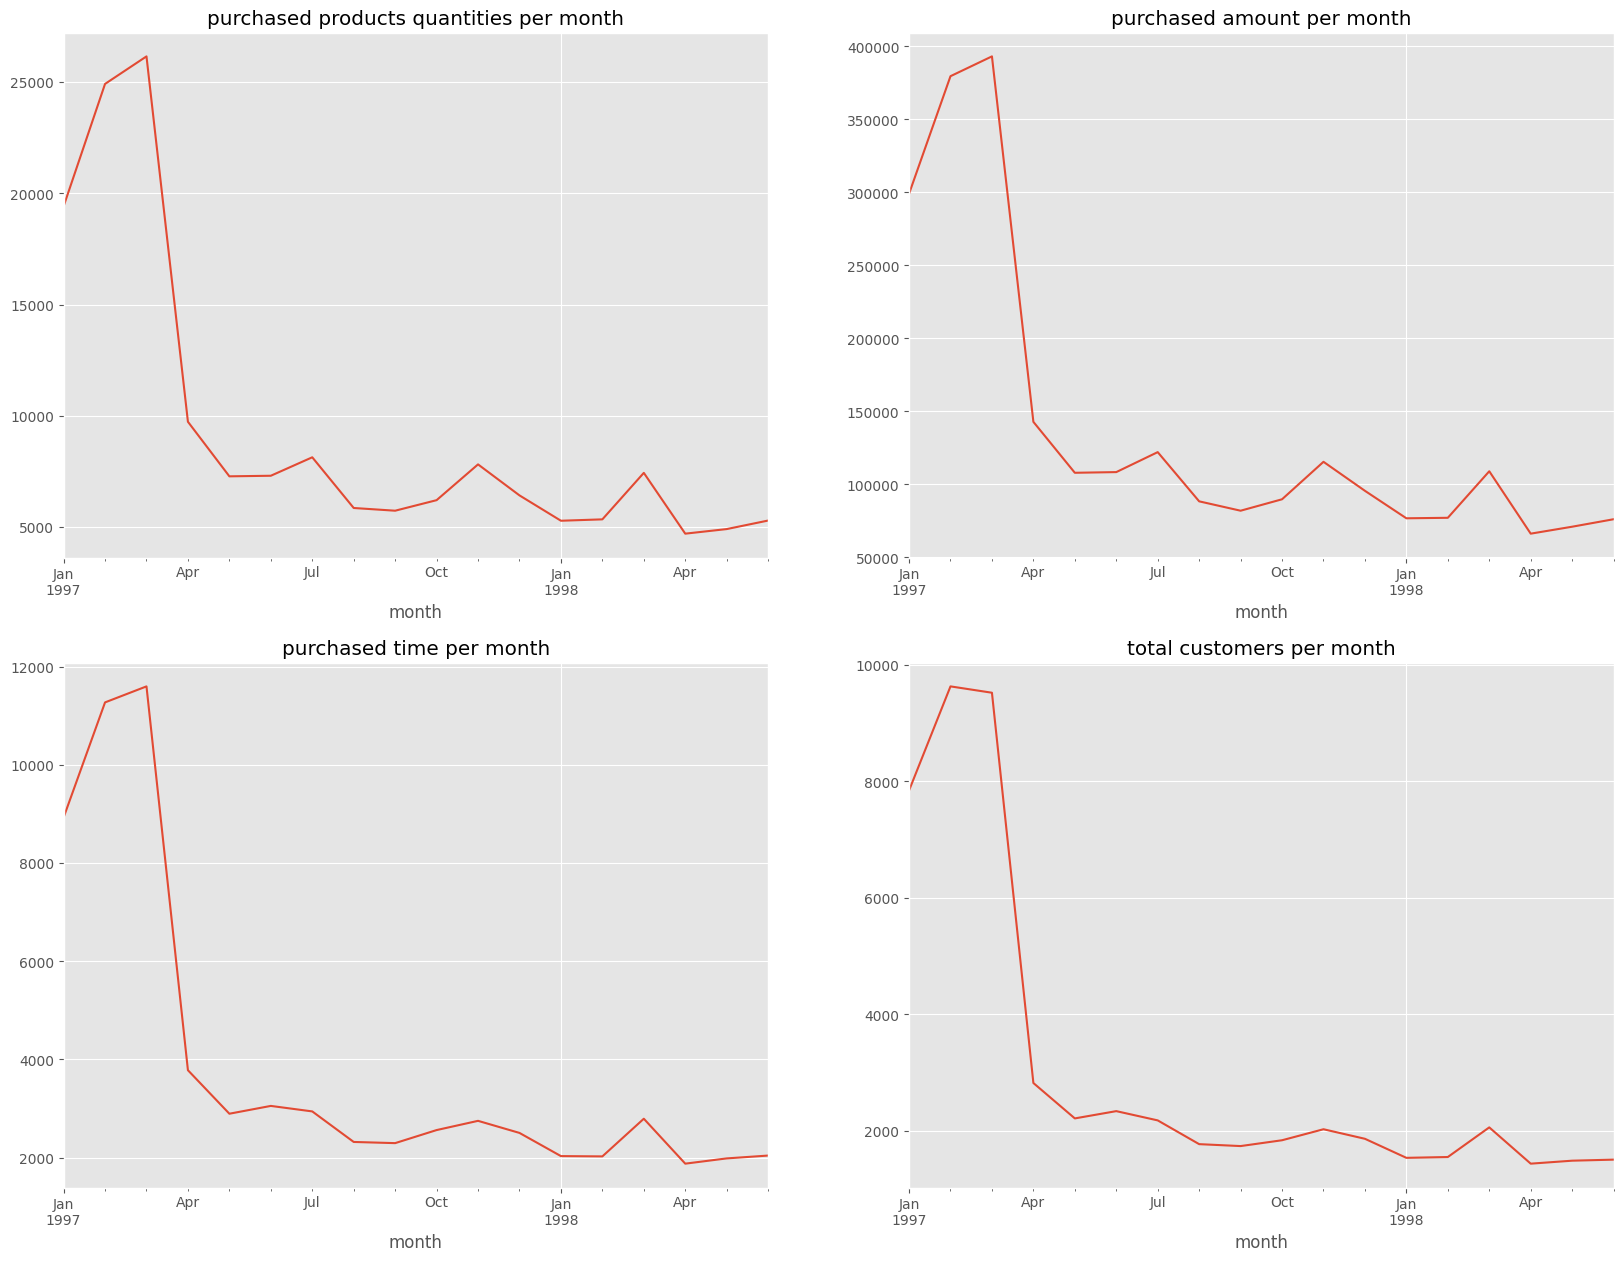

In [ ]:

# sumarize monthly purchase orders, order amount, order times, number of customers

plt.figure(figsize=(20,15))

# purchased products quantities per month
plt.subplot(221) #two rows two cols at first position
df.groupby(by='month')['order_products'].sum().plot()
plt.title('purchased products quantities per month')

# purchased amount per month
plt.subplot(222) #two rows two cols at first position
df.groupby(by='month')['order_amount'].sum().plot()
plt.title('purchased amount per month')

# purchased times per month
plt.subplot(223) #two rows two cols at first position
df.groupby(by='month')['user_id'].count().plot()
plt.title('purchased time per month')

# total customer per month (remove repeat customers)
plt.subplot(224) #two rows two cols at first position
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('total customers per month')

#analysis result:
#
#As can be seen from Figure 1, sales were very high in the first three months,
#and then became more stable and showed a slight downward trend. Moreover,
#the products quantities was between 20000 and 25000.Then the quanities declined to 10000 and lower.

#As can be seen from Figure 2, the amount of consumption was still relatively high in the first three months,
#which was positively correlated with the quantity of consumption. After March, it dropped seriously and showed a downward trend.
#What are your thoughts and reasons?
#1. Has the company increased its marketing efforts in January, February and March?
#2. Has the data from countries that celebrate special festivals? Such as the Chinese new year.

#As can be seen from Figure 3, the number of orders in the first three months was around 10,000,
#and the average number of orders in subsequent months was around 2,500.

#As can be seen from Figure 4, the number of consumers in the first three months was around 8,000-10,000,
#and the subsequent average consumption was less than 2,000.

#Conclusion:
#All data show that consumption in the first three months of 1997 was abnormal
#and then became normalized.

# Individual customer purchase behaviour analysis

### 1. Customer purchase amount, describe purchase times(product qualities)

In [ ]:
user_grouped = df.groupby(by='user_id').sum(numeric_only=True) #remove duplicate user id
print(user_grouped.describe())
print('Number of Customers: ', len(user_grouped))
# From the user's perspective:
# Total 23,570 users
# On average, every user bought 7 CDs
# But the median is 3
# The maxium number of purchase was 1033
# Mean was greater than median which implies a typical right-skewed distribution
# (Users whose purchase more products have increase the average purchase quantities for users
# whose purchase quantities were less than 7)

# From the purchase amount perspective:
# On verage, every user bought 106
# But the median is 43
# The maxium purchase amount was 13990
# Combining the quantile and the maximum value, the average is almost equal to the 75% quantile
# Belong to a typical right-skewed distribution
# This showed that there were a small number of users (the last 25% quantile)
# who spent a lot of money (these users have increased the average purchase amount for users
# whose purchase amount is less than 106)

           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
Number of Customers:  23570


<Axes: xlabel='order_products', ylabel='order_amount'>

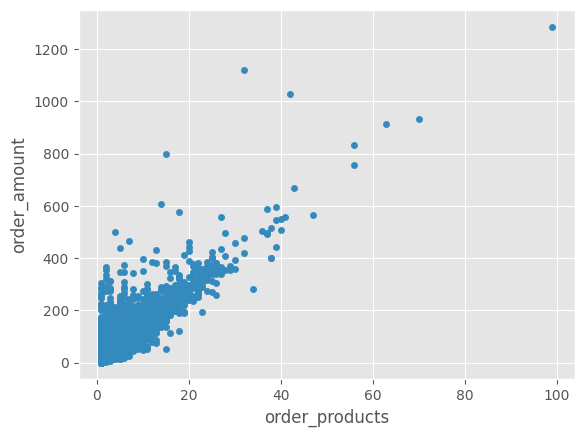

In [ ]:
# Draw user purchased product quantity and purchase amount scatter plot
df.plot(kind='scatter',x='order_products',y='order_amount')

# From the graph, user purchased product quantity and purchase amount showed linear trendline,
# the cost of every products was average $15
# The outliers were less (purchase amount > $1000, or purchase quantities > 60)
# It has little impact on the sample and can be ignored.

Text(0.5, 0, 'purchase quantity per user_id')

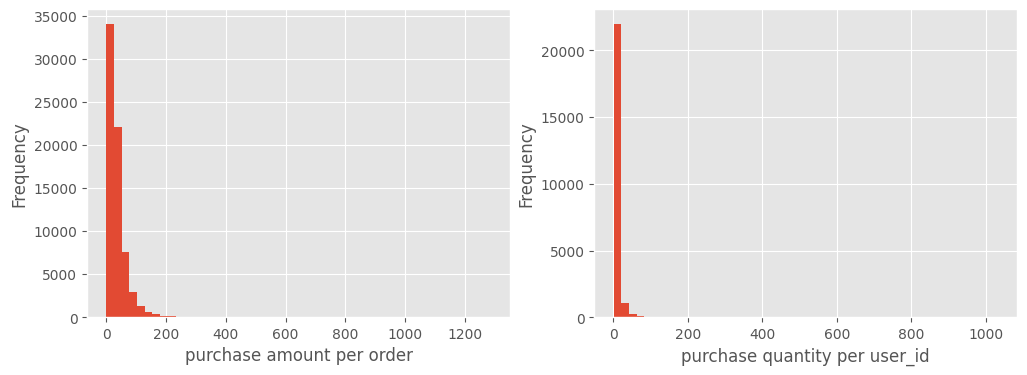

In [ ]:
# histogram
plt.figure(figsize=(12,4))
plt.subplot(121)
df['order_amount'].plot(kind='hist',bins=50)
plt.xlabel('purchase amount per order')
# In figure 1, most orders had purchase amount less than $100

plt.subplot(122)
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist',bins=50)
plt.xlabel('purchase quantity per user_id')
# In figure 2, Most users purchased a smaller number of products, less than 50.
# From both figures, Our users mainly have low consumption amounts
# and the vast majority of them purchase quantity less than 50.
# This is a very normal phenomenon in the e-commerce field.

### 3. The proportion of users’ cumulative consumption amount analysis (user’s contribution)

In [ ]:
#Group users, retrieve consumption amounts, sum, sort, and reset indexes
user_cumsum=df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [ ]:
# accumulated consumption amount of each user
user_cumsum['amount_cumsum'] = user_cumsum['order_amount'].cumsum()
user_cumsum.tail() # last 5 customer consumption and accumated consumption

,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


Text(0, 0.5, 'contribution rate %')

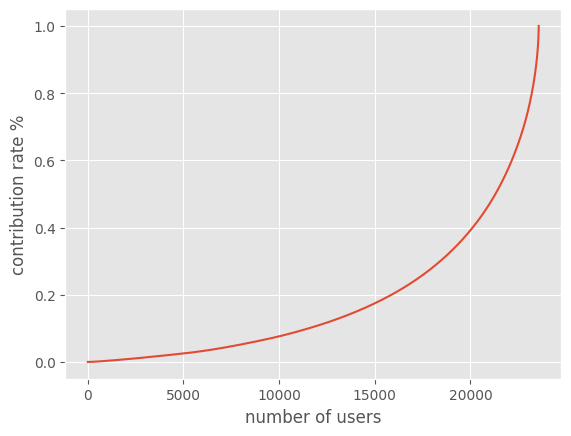

In [ ]:
# total accumulated consumption amount
amount_total = user_cumsum['amount_cumsum'].max()
# the total contribution rate of the top xx users e.g. top 5
user_cumsum['prop%'] = user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis=1)
#user_cumsum.tail()
user_cumsum['prop%'].plot()
plt.xlabel('number of users')
plt.ylabel('contribution rate %')

# It can be seen from the graph analysis，
# first 20,000 users contributed 40% of the consumption amount,
# the rest of 3,500 users contributed 60% of the consumption amount.
# (Pareto principle) aka 80-20 principle

### Customer Purchase Behaviour

#### 1. First Purchase Time

<Axes: title={'center': 'Frequency of First Orders by Date'}, xlabel='Order Date', ylabel='Count'>

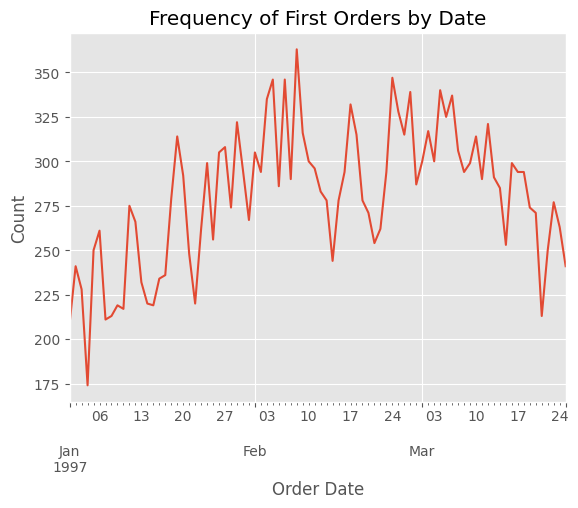

In [ ]:
df.groupby(by='user_id')['order_date'].min().value_counts().sort_index().plot(kind='line', title='Frequency of First Orders by Date', xlabel='Order Date', ylabel='Count')
# from the graph, the first time purchase user increased from Jan 1st to Feb 20th, then decline
# Possiblely due to promotion during this period
#

#### 2. Last Purchase Time

<Axes: title={'center': 'Frequency of First Orders by Date'}, xlabel='Order Date', ylabel='Count'>

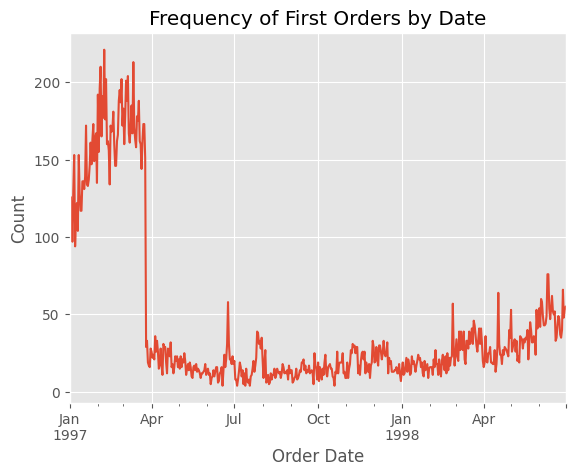

In [ ]:
df.groupby(by='user_id')['order_date'].max().value_counts().sort_index().plot(kind='line', title='Frequency of Last Orders by Date', xlabel='Order Date', ylabel='Count')
# Most users' last purchase time was around first three months of the year, i.e.Jan,Feb,Mar
# implied lack of loyalty customer
# As time move on, the number of users who last purchased an item is on the rise
#It’s possible that the data reflects the purchase history of users over the last 18 months,
#specifically those who made purchases within the first three months.

# User Layer

### 1. Create RFM model

In [ ]:
#create pivot table (index means groupby, values means columns)
rfm = df.pivot_table(index='user_id',
                    values=['order_products','order_amount','order_date'],
                    aggfunc={
                        'order_date':'max',# last purchase time
                        'order_products':'sum',#total purchase quantities
                        'order_amount':'sum' #total purchase amount
                    })
rfm.head()

,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [ ]:
# use every customer's last purchase time - max time value in the list, then convert to day, one decimal point
rfm['R'] = -(rfm['order_date'] - rfm['order_date'].max())/np.timedelta64(1,'D')
rfm.head()